### 逻辑回归

代价函数
- $J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)-\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]+\frac{\lambda}{2 m} \sum_{j=1}^{n} \theta_{j}^{2}$<br>

梯度更新
- $\theta_{j} :=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \cdot x_{j}^{(i)}+\frac{\lambda}{m} \theta_{j}\right)$

注意这里$\theta_{j}$的更新和线性回归略有不同，这里的在求和项里面，线性回归的在外面

![微信截图_20190801203533.png](https://i.loli.net/2019/08/02/5d43858dccf1f91793.png)


#### 构建代码

In [2]:
import numpy as np
import pandas as pd

In [3]:
class logistic():
    
    def __init__(self,n,gamma,alpha):
        self.n = n
        self.gamma = gamma
        self.alpha = alpha
        self.w = 1
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def train(self,x,y):
        W = np.random.randn(x.shape[1])
        for i in range(self.n):
            y_pred = self.sigmoid(np.dot(x,W))
            error = y_pred - y
            first = np.multiply(-y,np.log(y_pred))
            second = np.multiply((1-y),np.log(1-y_pred))
            loss = np.mean(first-second) + 0.5 * self.gamma * np.dot(W.T,W)
            if i % 50 == 0: print('loop is {},loss is {}'.format(i,loss))
            grad = np.mean(np.dot(x.T,error)+self.gamma*W)
            W = W - self.alpha * grad
        self.w = W
        return W
    
    def predict(self,new_x):
        pred = self.sigmoid(np.dot(new_x,self.w))
        if pred >= 0.5:
            return 1
        return 0

#### 数据准备

In [4]:
from sklearn.linear_model import stochastic_gradient
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
df = pd.read_csv('adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- 把输入值和输出值分开

In [8]:
df['income'] = df['income'].apply(lambda s : s.strip())
df.loc[df['income'] == '>50K', 'target'] = 1
df.loc[df['income'] != '>50K', 'target'] = 0

In [9]:
df[['income','target']].head()

,income,target
0,<=50K,0.0
1,<=50K,0.0
2,>50K,1.0
3,>50K,1.0
4,<=50K,0.0


In [10]:
df.drop(columns='income',inplace=True)

- 将分类变量和连续变量分开处理

In [11]:
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 
               'gender','native-country']
num_columns = ['age','fnlwgt','educational-num','capital-gain', 'capital-loss', 'hours-per-week']
target_column = "target"
# 离散类型热编码
encode_df = pd.get_dummies(df,columns=cat_columns)

In [12]:
encode_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,target,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


- 热编码处理后特征类型显著增加

In [13]:
# 提取输入和输出
df_x = encode_df.drop(columns=target_column)
df_y = encode_df[target_column]
df_y = df_y.values

In [14]:
# 处理连续特征
num_mean = df_x[num_columns].mean()
num_std = df_x[num_columns].std()
num_normal = (df_x[num_columns]-num_mean)/num_std

In [15]:
# 离散特征和连续特征合并
df_x = df_x.drop(columns=num_columns)       # 删去连续特征
df_x = pd.concat([df_x,num_normal],axis=1)  # 加上处理好的连续特征
df_x = df_x.values

- 划分数据集

In [16]:
s = StratifiedShuffleSplit(n_splits=2,train_size=0.7)  # 按0.7的比例划分数据集
for train_index,test_index in s.split(df_x,df_y):      # 划分两份，取最后一份
    trainx,testx = df_x[train_index],df_x[test_index]
    trainy,testy = df_y[train_index],df_y[test_index]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1788: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### 实践

In [23]:
model = logistic(500,0,0.00002)
model.train(trainx,trainy)

loop is 0,loss is 0.8750692766597591
loop is 50,loss is 0.8324163465128607
loop is 100,loss is 0.8319405918085522
loop is 150,loss is 0.8319350249204999
loop is 200,loss is 0.8319349592942512
loop is 250,loss is 0.8319349585201841
loop is 300,loss is 0.831934958511219
loop is 350,loss is 0.8319349585110698
loop is 400,loss is 0.8319349585109334
loop is 450,loss is 0.8319349585107005


array([-1.95864   , -0.43025302, -0.3698208 ,  0.09338737, -0.35165188,
       -0.17161705,  0.51179327,  0.09412238,  0.01197708, -0.20043527,
       -0.40875503, -2.88430279,  0.10948882,  0.37329404, -0.4465674 ,
       -0.02590794,  0.63039002, -0.12031312, -0.01045492, -0.05091531,
       -0.51783529, -0.79520234,  0.10885873, -0.37591035,  0.46701341,
       -0.02748917, -1.23186293,  0.50702064, -0.76184077,  1.22096098,
        0.89395474,  0.20350879, -0.62997936, -1.72566553,  0.91927027,
       -1.2797127 ,  2.52177227,  0.27190588, -0.29794118,  0.13065064,
        1.44148271,  1.21054996, -0.54092918,  2.02647879, -0.06625092,
       -1.1316354 ,  0.02019162, -0.18515121, -0.77178589, -1.29693103,
        1.27428676, -0.3897234 ,  0.30266017,  0.64736505,  1.79061586,
       -0.42218175,  1.54544825,  0.57554414, -3.6187751 , -0.65229954,
        0.64698041,  0.0658244 , -1.37952008, -1.18530113, -0.93625442,
       -0.33260501,  0.40264779, -0.40579135, -0.73445165,  1.53

- 计算准确率

In [24]:
a = [model.predict(testx[i]) for i in range(len(testx))]
b = [int(testy[i]) for i in range(len(testx))]
c = [1 for i in range(len(testx)) if a[i]==b[i]]     # 如果分类正确则加1
(len(c)/len(testx))

0.7248720573183214

#### 使用sklearn

- 导入模型

In [25]:
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss="log",max_iter = 100)

- 计算准确率

In [26]:
lr.fit(trainx,trainy)
lr.score(testx,testy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.8528147389969294

#### 模型评估

In [27]:
from sklearn.metrics import roc_auc_score,precision_recall_curve,classification_report,roc_curve

In [28]:
pred = lr.predict_proba(testx)[:,1]
pred_labels = lr.predict(testx)

In [29]:
pred,pred_labels

(array([0.48642158, 0.7973612 , 0.00234823, ..., 0.0671007 , 0.42548827,
        0.68888269]), array([0., 1., 0., ..., 0., 0., 1.]))

- AUC值

In [30]:
?roc_auc_score

In [154]:
print(roc_auc_score(testy,pred))

0.9070236813778256


In [31]:
print(classification_report(testy,pred_labels))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      3716
         1.0       0.74      0.60      0.66      1169

   micro avg       0.85      0.85      0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.85      0.85      0.85      4885



In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

- P-R曲线

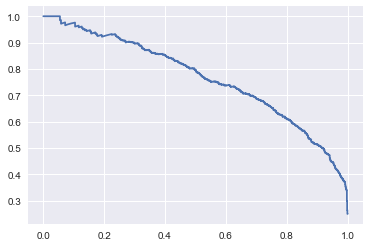

In [33]:
precision,recall,_ = precision_recall_curve(testy,pred)
plt.plot(recall,precision)

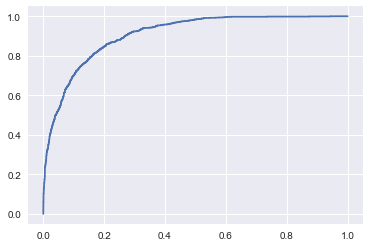

In [34]:
fpr,tpr,_ = roc_curve(testy,pred)
plt.plot(fpr,tpr)

### 非线性回归

#### 梯度提升
##### GradientBoosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = GradientBoostingClassifier(max_depth=6)
rfc.fit(trainx,trainy)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

- 准确性

In [40]:
rfc.score(testx,testy)

0.8761514841351075

- AUC

In [62]:
pred = rfc.predict_proba(testx)[:,1]
pred_labels = rfc.predict(testx)

In [66]:
print(roc_auc_score(testy,pred))
print('\n')
print(classification_report(testy,pred_labels))

0.9300269981335193


              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      3716
         1.0       0.79      0.65      0.72      1169

   micro avg       0.88      0.88      0.88      4885
   macro avg       0.85      0.80      0.82      4885
weighted avg       0.87      0.88      0.87      4885



##### XGboost

In [37]:
import xgboost as xgb

In [41]:
clf = xgb.XGBClassifier(max_depth = 7, learning_rate = 0.1, sub_sample = 0.7,
                         n_estimators = 20, reg_alpha = 0.1, reg_lambda = 1,colsample_bytree = 0.7)

- clf.fit中的X,y参数最好是pd的形式,numpy的array不行

In [57]:
X_train = pd.DataFrame(trainx)
y_train = pd.DataFrame(trainy)
X_test = pd.DataFrame(testx)
y_test = pd.DataFrame(testy)

In [59]:
clf.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],eval_metric='auc')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.866098	validation_1-auc:0.858254
[1]	validation_0-auc:0.908264	validation_1-auc:0.906094
[2]	validation_0-auc:0.911936	validation_1-auc:0.908729
[3]	validation_0-auc:0.911696	validation_1-auc:0.90919
[4]	validation_0-auc:0.915702	validation_1-auc:0.913186
[5]	validation_0-auc:0.916872	validation_1-auc:0.913793
[6]	validation_0-auc:0.918326	validation_1-auc:0.915086
[7]	validation_0-auc:0.918133	validation_1-auc:0.914551
[8]	validation_0-auc:0.919402	validation_1-auc:0.915363
[9]	validation_0-auc:0.920136	validation_1-auc:0.916074
[10]	validation_0-auc:0.920327	validation_1-auc:0.916475
[11]	validation_0-auc:0.921115	validation_1-auc:0.917164
[12]	validation_0-auc:0.922272	validation_1-auc:0.917886
[13]	validation_0-auc:0.922882	validation_1-auc:0.918429
[14]	validation_0-auc:0.923217	validation_1-auc:0.918478
[15]	validation_0-auc:0.92366	validation_1-auc:0.91884
[16]	validation_0-auc:0.924151	validation_1-auc:0.919326
[17]	validation_0-auc:0.924604	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, sub_sample=0.7, subsample=1, verbosity=1)

##### LightGBM

In [60]:
import lightgbm as lgb

In [81]:
clf1 = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
        importance_type='split', learning_rate=0.1, max_depth=15,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=40, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.1, reg_lambda=1, silent=True,
        subsample=0.5, subsample_for_bin=200000, subsample_freq=0)
clf1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],eval_metric='auc')

[1]	training's auc: 0.894143	training's binary_logloss: 0.508671	valid_1's auc: 0.896262	valid_1's binary_logloss: 0.508634
[2]	training's auc: 0.902191	training's binary_logloss: 0.476314	valid_1's auc: 0.901876	valid_1's binary_logloss: 0.476679
[3]	training's auc: 0.908912	training's binary_logloss: 0.450728	valid_1's auc: 0.908191	valid_1's binary_logloss: 0.451583
[4]	training's auc: 0.909913	training's binary_logloss: 0.429756	valid_1's auc: 0.908351	valid_1's binary_logloss: 0.431085
[5]	training's auc: 0.91138	training's binary_logloss: 0.412211	valid_1's auc: 0.910172	valid_1's binary_logloss: 0.413849
[6]	training's auc: 0.911898	training's binary_logloss: 0.397526	valid_1's auc: 0.910436	valid_1's binary_logloss: 0.399712
[7]	training's auc: 0.912556	training's binary_logloss: 0.384785	valid_1's auc: 0.910737	valid_1's binary_logloss: 0.387317
[8]	training's auc: 0.91316	training's binary_logloss: 0.373711	valid_1's auc: 0.911543	valid_1's binary_logloss: 0.376461
[9]	traini

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
        importance_type='split', learning_rate=0.1, max_depth=15,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=40, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.1, reg_lambda=1, silent=True,
        subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

#### 模型评估

- lr logisticRegression<br><br>
- rfc GradientBoosting<br><br>
- clf1 XGboost<br><br>
- clf2 LightGBM

In [84]:
y_pred1 = lr.predict(X_test)
y_true1 = y_test
y_score1 = lr.predict_proba(X_test)[:,1]

y_pred2 = rfc.predict(X_test)
y_true2 = y_test
y_score2 = rfc.predict_proba(X_test)[:,1]

y_pred3 = clf1.predict(X_test)
y_true3 = y_test
y_score3 = clf1.predict_proba(X_test)[:,1]

y_pred4 = clf2.predict(X_test)
y_true4 = y_test
y_score4 = clf2.predict_proba(X_test)[:,1]

In [85]:
fpr1,tpr1,thresholds1 = roc_curve(y_true1,y_score1,pos_label=1)
fpr2,tpr2,thresholds2 = roc_curve(y_true2,y_score2,pos_label=1)
fpr3,tpr3,thresholds3 = roc_curve(y_true3,y_score3,pos_label=1)
fpr4,tpr4,thresholds4 = roc_curve(y_true4,y_score4,pos_label=1)

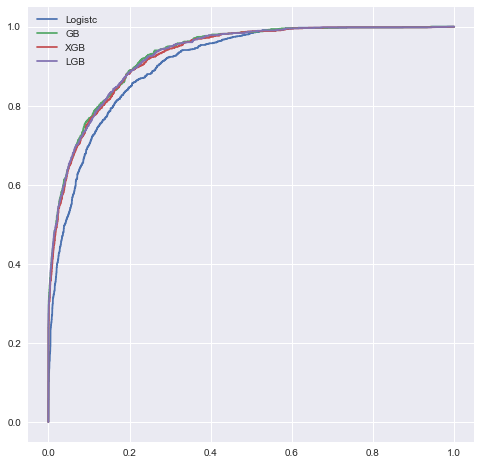

In [89]:
plt.figure(figsize=(8,8))
plt.plot(fpr1,tpr1,label='Logistc')
plt.plot(fpr2,tpr2,label='GB')
plt.plot(fpr3,tpr3,label='XGB')
plt.plot(fpr4,tpr4,label='LGB')

plt.legend()